## **LEVEL 1:**
**Task 1: Data collection and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/4) house Prediction Data Set.csv", sep=r'\s+') # Assuming space as delimiter, adjust if needed

In [3]:
print(df.dtypes)

0.00632    float64
18.00      float64
2.310      float64
0            int64
0.5380     float64
6.5750     float64
65.20      float64
4.0900     float64
1            int64
296.0      float64
15.30      float64
396.90     float64
4.98       float64
24.00      float64
dtype: object


In [4]:
obj_cols = df.select_dtypes(include='object').columns

for col in obj_cols:
    df[col] = df[col].str.replace(r'[^0-9.]', '', regex=True)

In [5]:
#missing values
df.fillna(df.mean(), inplace=True)

In [6]:
print(df.dtypes)

0.00632    float64
18.00      float64
2.310      float64
0            int64
0.5380     float64
6.5750     float64
65.20      float64
4.0900     float64
1            int64
296.0      float64
15.30      float64
396.90     float64
4.98       float64
24.00      float64
dtype: object


In [7]:
print(df.head())

   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  


In [8]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Task 2: EDA

In [9]:
df.describe()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


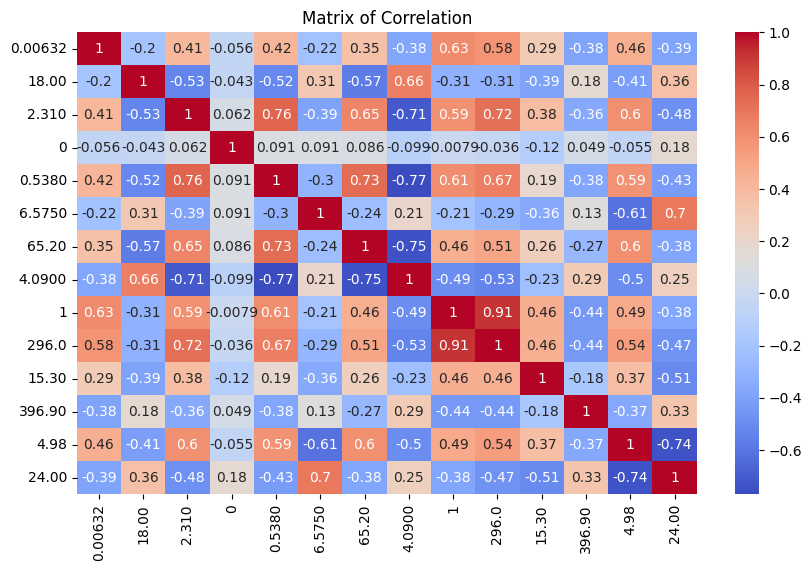

In [10]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrix of Correlation")
plt.show()

In [11]:
print(df.columns)

Index(['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900',
       '1', '296.0', '15.30', '396.90', '4.98', '24.00'],
      dtype='object')


In [12]:
selected = df.iloc[:, [0,1,2,3]]

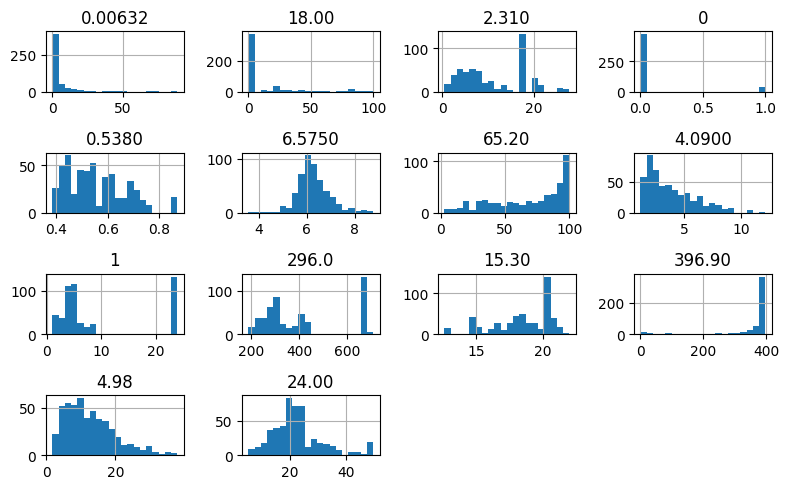

In [13]:
df.hist(figsize=(8,5), bins=20)
plt.tight_layout()
plt.show()

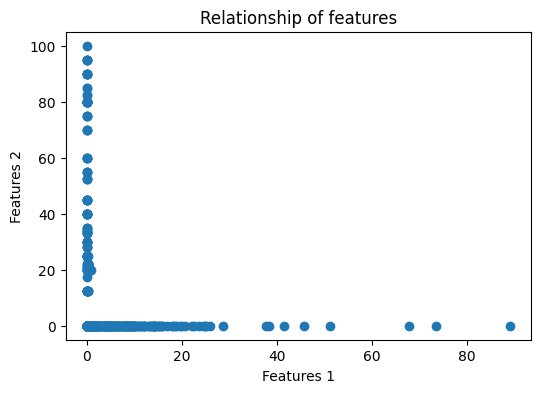

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel("Features 1")
plt.ylabel("Features 2")
plt.title("Relationship of features")
plt.show()

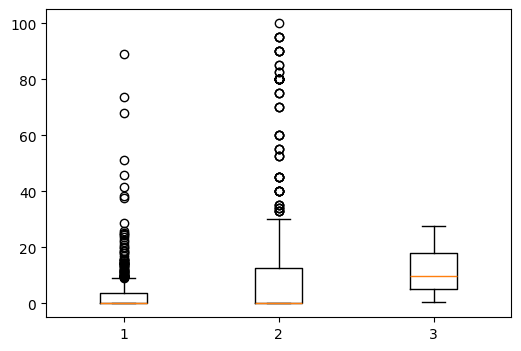

In [15]:
plt.figure(figsize=(6, 4))
plt.boxplot(x=df.iloc[:,:3])
plt.show()